# Stationary data and no serial correlation|

In [13]:
#Import the main libraries. 
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.core import datetools
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

Our working example for this case - Okun's Law

Before proceeding to analysis, let's understand the purpose. We want to estimate empirically the Okun's law for US for the period under consideration. Okun's Law represents the relationship between the change in Unemployment and the rate of growth of output in the economy

\begin{equation*}
U_t - U_{t-1} = - \gamma (G_t - G_N)
\end{equation*}

Assignment # 1: Draw time series graphs for both series and inspect visually, are these series stationary?

In [2]:
#load the .dta (stata) format data on US GDP from quarter 2, 1985 to quarter 3, 2009 (g GDP, u Unempl)
df = pd.read_stata('okun.dta')

In [3]:
df.head()

,g,u
0,1.4,7.3
1,2.0,7.2
2,1.4,7.0
3,1.5,7.0
4,0.9,7.2


In [9]:
#Create data index
ts = pd.period_range('1985Q2', periods=98, freq='Q')
df['Date'] = ts
df.set_index('Date')

,g,u
Date,,
1985Q2,1.4,7.3
1985Q3,2.0,7.2
1985Q4,1.4,7.0
1986Q1,1.5,7.0
1986Q2,0.9,7.2
1986Q3,1.5,7.0
1986Q4,1.2,6.8
1987Q1,1.5,6.6
1987Q2,1.6,6.3


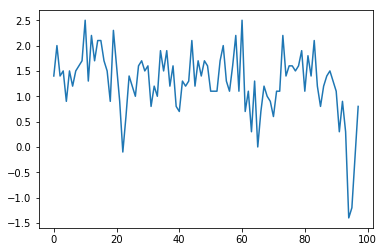

In [10]:
df['g'].plot() 
plt.show()

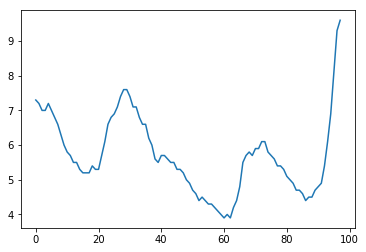

In [11]:
df['u'].plot() 
plt.show()

Assignment # 2. Re-write the model to make it applicable to time series methods

\begin{equation*}
\Delta U_t  = \alpha  + \beta_0 G_t + e_t
\end{equation*}

From empirical observatins we know that changes in GDP are likely to have distributed-lag effect on enmployment, we expand this formula to include lags of growth

\begin{equation*}
\Delta U_t  = \alpha  + \beta_0 G_t + \beta_1 G_{t-1} + ... \beta_q G_{t-q} ...  + e_t
\end{equation*}

Assignment #3. Using least squares estimate a model with 2 and 3 lags respectively. Interprete the results

In [13]:
#as a first step obtain the differenced values of unemployment and lags of GDP growth
#Create laged and differenced variables for further analysis
df['lag_g1'] = df['g'].shift(1)
df['lag_g2'] = df['g'].shift(2)
df['lag_g3'] = df['g'].shift(3)
df['du'] = df['u'].diff(periods=1)
#df['lag_du'] = df['du'].shift(1)

In [14]:
df.head()

,g,u,Date,lag_g1,lag_g2,lag_g3,du
0,1.4,7.3,1985Q2,NaN,NaN,NaN,NaN
1,2.0,7.2,1985Q3,1.4,NaN,NaN,-0.1
2,1.4,7.0,1985Q4,2.0,1.4,NaN,-0.2
3,1.5,7.0,1986Q1,1.4,2.0,1.4,0.0
4,0.9,7.2,1986Q2,1.5,1.4,2.0,0.2


In [12]:
# Import the linear regression from statsmodels
import statsmodels.api as sm

In [16]:
# drop columns and nan values
df.dropna(inplace=True)

In [20]:
# Prepare target and input variables. 
X1_multi=df.drop(['u','Date','du'], axis=1)
X2_multi=df.drop(['u','Date','du','lag_g3'], axis=1)
Y_target=df.du

In [21]:
# Add the costant to our input variables
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')
X2_multi=sm.tools.tools.add_constant(X2_multi, prepend=True, has_constant='skip')

In [22]:
# OLS Regression (Model with 3lags)
mod = sm.OLS(Y_target, X1_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     du   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     42.23
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           6.77e-20
Time:                        13:23:14   Log-Likelihood:                 33.716
No. Observations:                  95   AIC:                            -57.43
Df Residuals:                      90   BIC:                            -44.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5810      0.054     10.781      0.0

In [24]:
# OLS Regression (Model with 2 lags)
mod = sm.OLS(Y_target, X2_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     du   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     56.93
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           8.23e-21
Time:                        13:24:05   Log-Likelihood:                 33.712
No. Observations:                  95   AIC:                            -59.42
Df Residuals:                      91   BIC:                            -49.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5833      0.047     12.297      0.0

Assignment # 4. Interprete the models in details (We choose to interpret lag 2 model)

 - 1% increase in growth rate leads to a fall in unemployment rate of 0.20% in the current quarter, 0.16% in the next quarter and 0.07% two quarters from now, holding other factors fixed
 - The total multiplier is the sum of these 3 - 0.44%. This is the effect that would be achieved if the growth rate increased by 1% and stayed at that level afterwards
 - It is possible to estimate the normal growth rate that is needed to maintain a constant unemployment rate:

\begin{equation*}
\Delta U_t  = \alpha  + \beta_0 G_t + e_t
\end{equation*}

set $\Delta U_t = 0$, sum all the $\beta$s, to obtain:

\begin{equation*}
\hat{G}_N  = \hat{\alpha} / \hat{\gamma}  
\end{equation*}

and obtain growth rate of 1.3% per quarter. 

# Serial correlation

What if our assumption of $cov(e_t, e_s)=0$ for $t \neq s$ was wrong?

When a variable exhibits correlation over time, we say it is autocorrelated or serially correlated; we will use these two terms interchangeably. Both observable time-series variables such as
$DU$ and $G$, and the unobservable error $e$, can be autocorrelated. Autocorrelation in the error can arise from an autocorrelated omitted variable, or it can arise if a dependent variable y is
autocorrelated and this autocorrelation is not adequately explained by the x’s and their lags that are included in the equation.

### Less formal ways of detecting autocorrelation

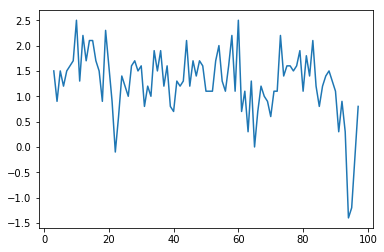

In [26]:
#reconsider time series graph of G, what do you notice?
df['g'].plot() 
plt.show()

In [27]:
# high growth periods are usually followed by high growth periods, and vice versa (overall)

Assignment #5. Plot a scatter diagram of $G_t$ vs $G_{t-1}$

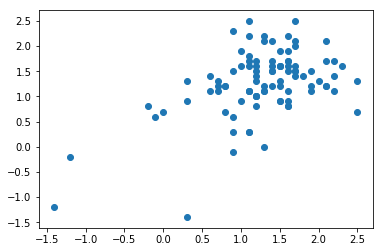

In [28]:
plt.scatter(df['lag_g1'],df['g'], s=None, c=None, marker=None, cmap=None, norm=None)

Assignment #6. k-th order sample autocorrelations with their test statistics (to test whether these correlations are stiatistiaclly signficant)

In [34]:
df['g'].autocorr(lag=1)

0.4976191252195971

In [35]:
df['g'].autocorr(lag=2)

0.4274832953140102

In [36]:
df['g'].autocorr(lag=3)

0.18469136399201905

In [38]:
df['g'].autocorr(lag=4)

0.26242775899138054

Note: 
The autocorrelations at lags one and two are moderately high; those at lags three and four are much smaller—less than half the magnitude of the earlier ones. How do we test whether an autocorrelation is significantly different from zero? Let the kth order population autocorrelation be denoted by rk. Then, when the null hypothesis $H_0$ : $\rho_k=0$ is true, it turns out that $r_k$ has an approximate normal distribution with mean zero and variance 1/T. Thus, a suitable test statistic is:

\begin{equation*}
Z = \frac {r_k-0}{\sqrt{1/T}} = \sqrt{T} r_k
\end{equation*}

We reject the null if the test statistic is greater than 2. 

Assignment #7. Correlogram or auto-correlation plots

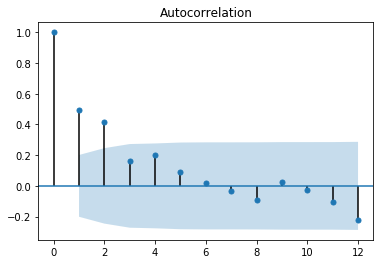

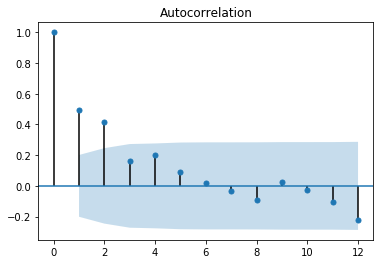

In [39]:
# Look at the ACF for this data
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['g'],lags=12)

#Assignment 8: Apply ACF to our model above to test the validity of the claim that errors are not serially correlated. Provide your conclusion

                            OLS Regression Results                            
Dep. Variable:                     du   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     56.93
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           8.23e-21
Time:                        14:44:56   Log-Likelihood:                 33.712
No. Observations:                  95   AIC:                            -59.42
Df Residuals:                      91   BIC:                            -49.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5833      0.047     12.297      0.0

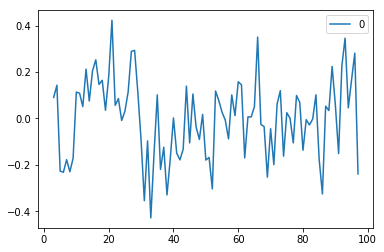

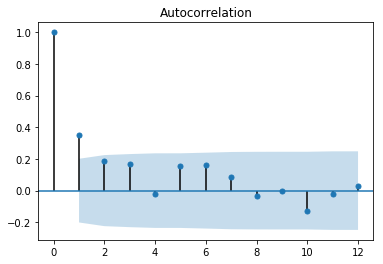

In [46]:
# OLS Regression (Model with 2 lags)
model = sm.OLS(Y_target, X2_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

## Accute problem of serially correlated errors

A Phillips Curve

The Phillips curve has a long history in macroeconomics as a tool for describing the relationship between inflation and unemployment. Our starting point is the model

\begin{equation*}
INF_t  = INF^E_t - \gamma (U_t - U_{t-1})
\end{equation*}

The model to be estimated would be then:

\begin{equation*}
INF_t  = \beta_1 + \beta_2 DU_t + e_t
\end{equation*}

In [2]:
#load the .dta (stata) format data on US GDP from quarter 2, 1987 to quarter 3, 2009 (obs.=90, g GDP, u Unempl)
df = pd.read_stata('C:\\Users\\Gaya\\Desktop\\ARDL notebook and data files-20190124\\phillips_aus.dta')

In [3]:
#Create data index
ts = pd.period_range('1987Q1', periods=91, freq='Q')
df['Date'] = ts
df.set_index('Date',inplace=True)

Assignment #9. Run the model, interprete the results. Plot the residuals autocorrelation plot and comment on the validity of applying least squares approach here. 

In [4]:
df.head()

,inf,u
Date,,
1987Q1,2.0,8.1
1987Q2,1.5,8.0
1987Q3,1.7,7.8
1987Q4,1.8,7.7
1988Q1,1.8,7.3


In [8]:
df

,inf,u
Date,,
1987Q1,2.0,8.1
1987Q2,1.5,8.0
1987Q3,1.7,7.8
1987Q4,1.8,7.7
1988Q1,1.8,7.3
1988Q2,1.7,7.3
1988Q3,1.9,6.7
1988Q4,2.0,6.5
1989Q1,1.0,6.3


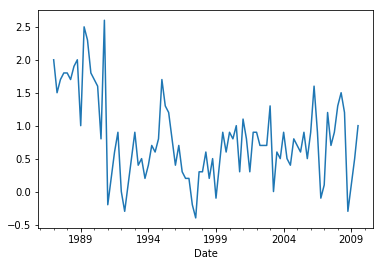

In [5]:
df['inf'].plot() 
plt.show()

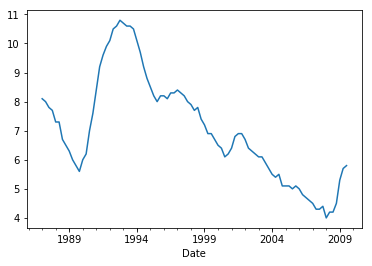

In [6]:
df['u'].plot() 
plt.show()

In [9]:
df['du'] = df['u'].diff(periods=1)

In [10]:
df

,inf,u,du
Date,,,
1987Q1,2.0,8.1,NaN
1987Q2,1.5,8.0,-0.1
1987Q3,1.7,7.8,-0.2
1987Q4,1.8,7.7,-0.1
1988Q1,1.8,7.3,-0.4
1988Q2,1.7,7.3,0.0
1988Q3,1.9,6.7,-0.6
1988Q4,2.0,6.5,-0.2
1989Q1,1.0,6.3,-0.2


In [11]:
# Import the linear regression from statsmodels
import statsmodels.api as sm
# drop columns and nan values
df.dropna(inplace=True)

In [12]:
df

,inf,u,du
Date,,,
1987Q2,1.5,8.0,-0.1
1987Q3,1.7,7.8,-0.2
1987Q4,1.8,7.7,-0.1
1988Q1,1.8,7.3,-0.4
1988Q2,1.7,7.3,0.0
1988Q3,1.9,6.7,-0.6
1988Q4,2.0,6.5,-0.2
1989Q1,1.0,6.3,-0.2
1989Q2,2.5,6.0,-0.3


In [13]:
df.columns

Index(['inf', 'u', 'du'], dtype='object')

In [18]:
# Prepare target and input variables. 
X1_multi=df.drop(['inf','u'], axis=1)
Y_target=df.inf

In [19]:
# Add the costant to our input variables
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')


In [20]:
# OLS Regression (Model with 3lags)
mod = sm.OLS(Y_target, X1_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    inf   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     5.295
Date:                Thu, 24 Jan 2019   Prob (F-statistic):             0.0238
Time:                        17:32:22   Log-Likelihood:                -83.958
No. Observations:                  90   AIC:                             171.9
Df Residuals:                      88   BIC:                             176.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7776      0.066     11.813      0.0

# General approach: ARDL models 

An autoregressive distributed lag (ARDL) model is one that contains both lagged xt’s and
lagged yt’s. In its general form, with p lags of y and q lags of x, an ARDL(p, q) model can be
written as:





\begin{equation*}
y_t=δ + θ_1 y_{(t-1)}+ ... + θ_p y_{(t-p)}+δ_0 x_t+δ_1 x_{(t-1)}+ ... +δ_q x_{(t-q)}+v_t
\end{equation*}

There are a number of different criteria for choosing p and q. Because they all do not
necessarily lead to the same choice, there is a degree of subjective judgment that must be
used. Four possible criteria are
1. Has serial correlation in the errors been eliminated? If not, then least squares will be
biased in small and large samples. It is important to include sufficient lags, especially
of y, to ensure that serial correlation does not remain. It can be checked using the
correlogram or Lagrange multiplier tests.
2. Are the signs and magnitudes of the estimates consistent with our expectations from
economic theory? Estimates which are poor in this sense may be a consequence of
poor choices for p and q, but they could also be symptomatic of a more general
modeling problem.
3. Are the estimates significantly different from zero, particularly those at the longest
lags?
4. What values for p and q minimize information criteria such as the AIC and SC?
Information criteria were first considered in Chapter 6. In the context of the ARDL
model they involve choosing p and q to minimize the sum of squared errors (SSE)
subject to a penalty that increases as the number of parameters increases. Increasing
lag lengths increases the number of parameters, and, providing we use the same
number of observations in each case,11 it reduces the sum of squared errors; penalty
terms are included with a view to capturing the essential lag effects without
introducing an excessive number of parameters. The Akaike information criterion
(AIC) is given by

\begin{equation*}
AIC = ln (\frac{SSE}{T}) + \frac{2K}{T}
\end{equation*}

Understanding how including lags of dependent variable can eliminate the serial correlation of errors. Consider the following model with specific autocorrelation in the errors:

\begin{equation*}
y_t = \beta_1 + \beta_2 x_t + e_t \space  \text{with} \space  e_t = \rho e_{t-1} + v_t
\end{equation*}


$v_t$ are uncorrelated random variables with mean zero and constant variance. 

Substitution $e_t$ into $y_t$ yields:

\begin{equation*}
y_t = \beta_1 + \beta_2 x_t + \rho e_{t-1} + v_t  
\end{equation*}

But it is immediate to know that the error term in the previous period can be written as (from our main model on the top):

\begin{equation*}
e_{t-1} = y_{t-1} - \beta_1 - \beta_2 x_t
\end{equation*}

Final step would be to replace the value of $e_{t-1}$ in the $y_{t}$ above with the expression for $e_{t-1}$ . As a result we obtain a model where the errors are not any more serially correlated:

\begin{equation*}
y_t = \beta_1 (1- \rho) + \beta_2 x_t + \rho y_{t-1} - \rho \beta_2 x_{t-1} + v_t  
\end{equation*}

The ARDL model is more general approach, but the logic closely follows this one. 

### Applying ARDL to Phillips curve data

In [44]:
#load the .dta (stata) format data on US GDP from quarter 2, 1987 to quarter 3, 2009 (obs.=90, g GDP, u Unempl)
df = pd.read_stata('C:\\Users\\Gaya\\Desktop\\ARDL notebook and data files-20190124\\phillips_aus.dta')

In [45]:
df

,inf,u
0,2.0,8.1
1,1.5,8.0
2,1.7,7.8
3,1.8,7.7
4,1.8,7.3
5,1.7,7.3
6,1.9,6.7
7,2.0,6.5
8,1.0,6.3
9,2.5,6.0


In [46]:
#as a first step obtain the differenced values of inflation and unemployment
#Create laged and differenced variables for further analysis
df['lag_inf1'] = df['inf'].shift(1)
df['lag_inf2'] = df['inf'].shift(2)
df['lag_inf3'] = df['inf'].shift(3)
df['du'] = df['u'].diff()
df['lag_u1'] = df['u'].shift(1)
df['lag_du1'] = df['du'].shift(1)

In [47]:
df.head()

,inf,u,lag_inf1,lag_inf2,lag_inf3,du,lag_u1,lag_du1
0,2.0,8.1,NaN,NaN,NaN,NaN,NaN,NaN
1,1.5,8.0,2.0,NaN,NaN,-0.1,8.1,NaN
2,1.7,7.8,1.5,2.0,NaN,-0.2,8.0,-0.1
3,1.8,7.7,1.7,1.5,2.0,-0.1,7.8,-0.2
4,1.8,7.3,1.8,1.7,1.5,-0.4,7.7,-0.1


### Start with ARDL (1,0)

In [48]:
# drop columns and nan values
df.dropna(inplace=True)

# Prepare target and input variables. 
X1_multi=df.drop(['inf','u','lag_inf2','lag_inf3','lag_u1','lag_du1'], axis=1)
Y_target=df.inf


In [49]:
# you can also use this command to get the autocorrelation of errors. 
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [50]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')
mod = sm.OLS(Y_target, X1_multi)
res = mod.fit()
print(res.summary())
model_fit = mod.fit(disp=0)

                            OLS Regression Results                            
Dep. Variable:                    inf   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     20.65
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           4.89e-08
Time:                        12:50:41   Log-Likelihood:                -66.536
No. Observations:                  88   AIC:                             139.1
Df Residuals:                      85   BIC:                             146.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3576      0.089      4.036      0.0

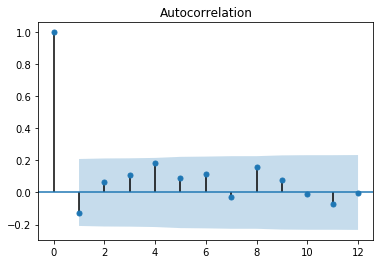

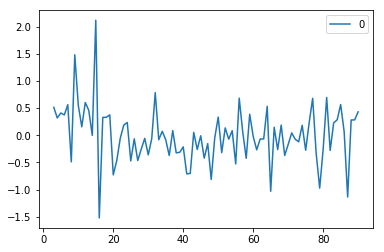

In [51]:
# Check the autocorrelation of errors after fitting the model as above. 
model_fit = mod.fit(disp=0)
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

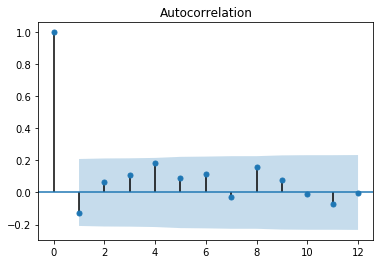

In [52]:
# you can also use this command to get the autocorrelation of errors. 
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals,lags=12)

#Assignment 10: Test other options, in particular ARDL (1,1) and ARDL (2,0). State the model you prefer and tell us why?

# ARDL(1,1)

In [53]:
df.columns

Index(['inf', 'u', 'lag_inf1', 'lag_inf2', 'lag_inf3', 'du', 'lag_u1',
       'lag_du1'],
      dtype='object')

In [57]:
# drop columns and nan values
df.dropna(inplace=True)

# Prepare target and input variables. 
X1_multi=df.drop(['inf','u','lag_inf2','lag_inf3', 'lag_u1'], axis=1)
Y_target=df.inf


In [58]:
X1_multi

,lag_inf1,du,lag_du1
3,1.7,-0.1,-0.2
4,1.8,-0.4,-0.1
5,1.8,0.0,-0.4
6,1.7,-0.6,0.0
7,1.9,-0.2,-0.6
8,2.0,-0.2,-0.2
9,1.0,-0.3,-0.2
10,2.5,-0.2,-0.3
11,2.3,-0.2,-0.2
12,1.8,0.4,-0.2


In [59]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')
mod = sm.OLS(Y_target, X1_multi)
res = mod.fit()
print(res.summary())
model_fit = mod.fit(disp=0)

                            OLS Regression Results                            
Dep. Variable:                    inf   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     14.31
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.29e-07
Time:                        12:53:52   Log-Likelihood:                -65.795
No. Observations:                  88   AIC:                             139.6
Df Residuals:                      84   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3364      0.090      3.732      0.0

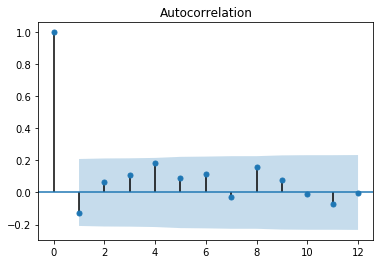

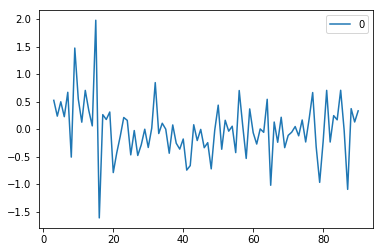

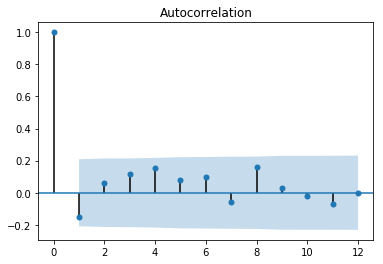

In [60]:
# Check the autocorrelation of errors after fitting the model as above. 
model_fit = mod.fit(disp=0)
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# you can also use this command to get the autocorrelation of errors. 
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals,lags=12)

# ARDL(2,1)

In [61]:
# drop columns and nan values
df.dropna(inplace=True)

# Prepare target and input variables. 
X1_multi=df.drop(['inf','u','lag_inf3', 'lag_u1'], axis=1)
Y_target=df.inf


In [62]:
X1_multi

,lag_inf1,lag_inf2,du,lag_du1
3,1.7,1.5,-0.1,-0.2
4,1.8,1.7,-0.4,-0.1
5,1.8,1.8,0.0,-0.4
6,1.7,1.8,-0.6,0.0
7,1.9,1.7,-0.2,-0.6
8,2.0,1.9,-0.2,-0.2
9,1.0,2.0,-0.3,-0.2
10,2.5,1.0,-0.2,-0.3
11,2.3,2.5,-0.2,-0.2
12,1.8,2.3,0.4,-0.2


                            OLS Regression Results                            
Dep. Variable:                    inf   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     13.08
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           2.63e-08
Time:                        12:57:49   Log-Likelihood:                -62.452
No. Observations:                  88   AIC:                             134.9
Df Residuals:                      83   BIC:                             147.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2398      0.095      2.521      0.0

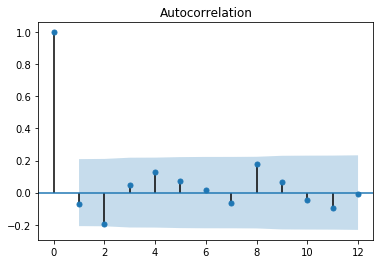

In [63]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')
mod = sm.OLS(Y_target, X1_multi)
res = mod.fit()
print(res.summary())
model_fit = mod.fit(disp=0)
residuals = DataFrame(model_fit.resid)
plot_acf(residuals,lags=12)

Are you satisfied with the model that you obtain? What would you change to get a better model? What criteria do you use to make that statement?

Once you have answered the previous question and estimated the final model, how would you apply that to forecast the unemployment in the 4th Quarter of 2009 and 1st Quarter of 2010? Can you try to do this?

In [ ]:
df['lag_g1'] = df['g'].shift(1)
df['lag_g2'] = df['g'].shift(2)

# Questions

Lagrange model test usefulnes, vs correlogram, implementation in python

\begin{equation*}
INF_t  = INF^E_t - \gamma (U_t - U_{t-1})
\end{equation*}

\begin{equation*}
INF_t  = \beta_1 + \beta_2 DU_t + e_t
\end{equation*}

In phillips curve .. in ARDL(2,1).. do wee need to take u_lag1 or du_lag1????